# 1. Knihovny a moduly pro matematické výpočty 

In [13]:
import sympy as sp
import scipy as sc
import scipy.integrate as spi
import numpy as np
import math
import time
import random
import sys
import pandas as pd
import matplotlib.pyplot as plt
import hashlib
from pynput import mouse

# 1. Matematické knihovny

In [79]:
def scalar_pyt(vektor1, vektor2):
    if len(vektor1) != len(vektor2):
        raise ValueError("Různa velikost vektorů")
    
    result = 0

    for i in range(len(vektor1)):
        result += vektor1[i] * vektor2[i]
    return result

def scalar_zip(vektor1, vektor2):
    if len(vektor1) != len(vektor2):
        raise ValueError("Různa velikost vektorů")
    
    result = 0

    for i, j in zip(vektor1, vektor2):
        result += i * j
    return result

def scalar_num(vektor1, vektor2):
    result = np.dot(vektor1, vektor2)
    return result

vektor1 = np.arange(0, 300000, 3)
vektor2 = np.arange(0, 200000,2)

times = []
start = time.time()
scalar_val = scalar_pyt(vektor1, vektor2)
end = time.time()

times.append(end - start)

start = time.time()
scalar_test_val = scalar_zip(vektor1,vektor2)
end = time.time()

times.append(end - start)

start = time.time()
scalar_num = scalar_num(vektor1,vektor2)
end = time.time()

times.append(end - start)
print(f" Výsledek pomocí indexů: {scalar_val} v čase: {times[0]}")
print(f" Výsledek pomocí zip: {scalar_test_val} v čase: {times[1]}")
print(f" Výsledek pomocí numpy: {scalar_num} v čase: {times[2]}")

 Výsledek pomocí indexů: 1298848416 v čase: 0.12394833564758301
 Výsledek pomocí zip: 1298848416 v čase: 0.09806656837463379
 Výsledek pomocí numpy: 1298848416 v čase: 0.0


In [146]:
def integrate_pyt(f, a, b, n):
    h = float(b - a) / n
    integral = (f(a) + f(b)) / 2.0
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

def integrate_scipy(f, a, b):
    result, _ = spi.quad(f, a, b)
    return result

def f(x):
    return x**2

a = 0
b = 1
n = 10**8

start = time.time()
result_py = integrate_pyt(f, a, b, n)
end = time.time() - start
print(f"Výsledek pomocí základního Pythonu: {result_py} v čase: {end}")

start = time.time()
result_scipy = integrate_scipy(f, a, b)
end = time.time() - start
print(f"Výsledek pomocí SciPy: {result_scipy} v čase: {end}")


Výsledek pomocí základního Pythonu: 0.3333333333332225 v čase: 24.062889575958252
Výsledek pomocí SciPy: 0.33333333333333337 v čase: 0.0


In [84]:
def cumsum_pyt(input_list):
    result = []
    summ = 0
    for num in input_list:
        summ += num
        result.append(summ)
    return result

def cumsum_num(input_list):
    return np.cumsum(input_list)

test_list = np.arange(1, 1000001)

start = time.time()
result_py = cumsum_pyt(test_list)
end = time.time() - start
print(f"Výsledek pomocí základního pythonu: {result_py[-1]} s časem: {end}")

start = time.time()
result_num = cumsum_num(test_list)
end = time.time() - start
print(f"Výsledek pomocí knihovny numpy: {result_num[-1]} s časem: {end}")

Výsledek pomocí základního pythonu: 1784293664 s časem: 0.15536975860595703
Výsledek pomocí knihovny numpy: 1784293664 s časem: 0.0006718635559082031


In [117]:
def derive_pyt(f, x, h = 1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def derive_sym(symexp, var, value):
    derivative = sp.diff(symexp, var)
    result = derivative.subs(var, value).evalf()
    return result

def f(x):
    return x**2 + 3 * x + 2
val = 1

start = time.time()
result_pyt = derive_pyt(f, val)
end = time.time() - start 
print(f"Výsledek pomocí základního pythonu: {result_pyt} s časem: {end}")
x = sp.symbols('x')
symexp = x**2 + 3 * x + 2

start = time.time()
result_sym = derive_sym(symexp, x, val)
end = time.time() - start 
print(f"Výsledek pomocí knihovny sympy: {result_sym} s časem: {end}")

Výsledek pomocí základního pythonu: 4.999999999988347 s časem: 0.0
Výsledek pomocí knihovny sympy: 5.00000000000000 s časem: 0.0052032470703125


In [131]:
origin_recursion = sys.getrecursionlimit()
sys.setrecursionlimit(2500)

def factorial_pyt(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial_pyt(n-1)


def factorial_math(n):
    return math.factorial(n)

n = 1558
start = time.time()
result_pyt = factorial_pyt(n)
end = time.time() - start 
print(f"Výsledek pomocí základního pythonu: {result_pyt} s časem: {end}")


start = time.time()
result_math = factorial_math(n)
end = time.time() - start 
print(f"Výsledek pomocí knihovny math: {result_math} s časem: {end}")

sys.setrecursionlimit(origin_recursion)

Výsledek pomocí základního pythonu: 2424858401169875856987549316530261243529336396354700842715749979460646110058233651782392648030625575890603295838549136086203631494904372698578181999057212055535785846413969420066573092861481554378165635499319577948946469878800693106187103360224139995239288292467274991657581799887960732860730465294056429604010675825650845592134295845654185424392132561718318353026455262912039002664120813132000602020151818744862796534620281615341820385425346251471878908201301227337883132211649086124629581129201309548248991126780745470297556208250525153383428851713805456555419758707284753260768805845944423382917543868035509410367649517977378961396490420583560768554085728596839435423979501005167390976056828737759722931049053051870481354220566751757226315251920734049093559363656820097662644345104685665152444697669009659982518091310671058073959926600845011866653850725006741331610135998770449096045426206531544154144601729043078225608136613193686346346764203375001081246967670

# 2. Vizualizace dat

In [192]:
# Úprava datframu pro přehlednost a výpovědní hodnotu sledovaných dat
# Sloupec "money" je vedený v Ukrajinských hřivnách, tudíž vytvořím nový sloupec s přepočtem na České koruny
# Přepočet je na základě aktuálního kurzu v čase, kdy se převodem zabývám
# Kurz: 1 UAH = 0.549400 CZK Zdroj https://www.kurzy.cz/kurzy-men/prevodnik-men/UAH-CZK/

# Kód je zakomentován, aby se při každém spuštění celého souboru nevykonával znovu
#def convert_currency(file):
#    df = pd.read_csv(file)    
#    exchange_rate = 0.549400
#    df['money_czk'] = df['money'] * exchange_rate
#    df['money_czk'] = df['money_czk'].round(1)
#    df.to_csv("index.csv", index=False)

#file = "index.csv"
#convert_currency(file)

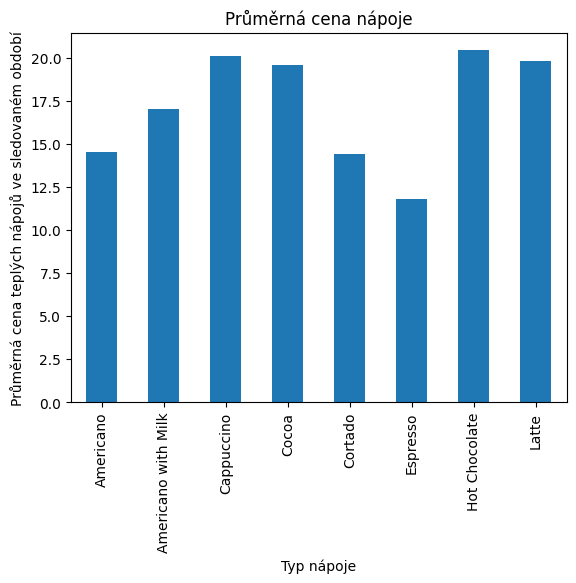

In [194]:
def draw(file):
    df = pd.read_csv(file)
    grouped = df.groupby(['coffee_name'])['money_czk'].mean()
    grouped.plot(kind = 'bar', title = "Průměrná cena nápoje", 
                 xlabel = "Typ nápoje", ylabel = "Průměrná cena teplých nápojů ve sledovaném období")
    plt.show()

file = "index.csv"
draw(file)

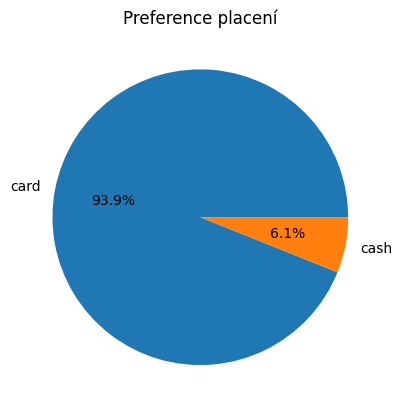

In [126]:
def draw(file):
    df = pd.read_csv(file)
    grouped = df.groupby(['cash_type'])['coffee_name'].count()
    grouped.plot(kind = 'pie', autopct = '%1.1f%%', title = "Preference placení", ylabel = "")

file = "index.csv"
draw(file)

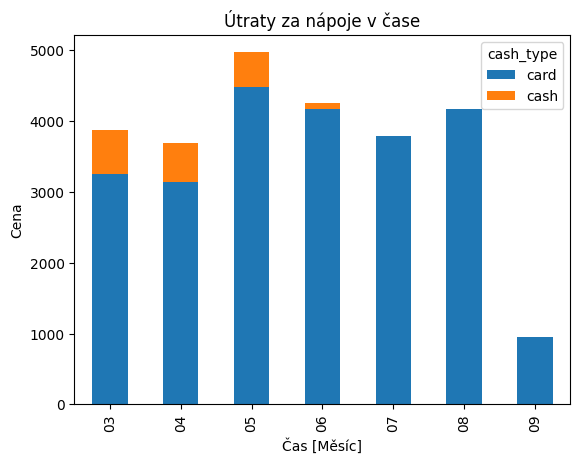

In [195]:
def draw(file):
    df = pd.read_csv(file)
    df['date'] = df['date'].str[5:7]
    grouped = df.groupby(['date','cash_type'])['money_czk'].sum().unstack(fill_value = 0)
    grouped.plot(kind = 'bar',
                 xlabel = 'Čas [Měsíc]', ylabel = 'Cena', title = 'Útraty za nápoje v čase',
                 stacked = True)
    
file = "index.csv"
draw(file)

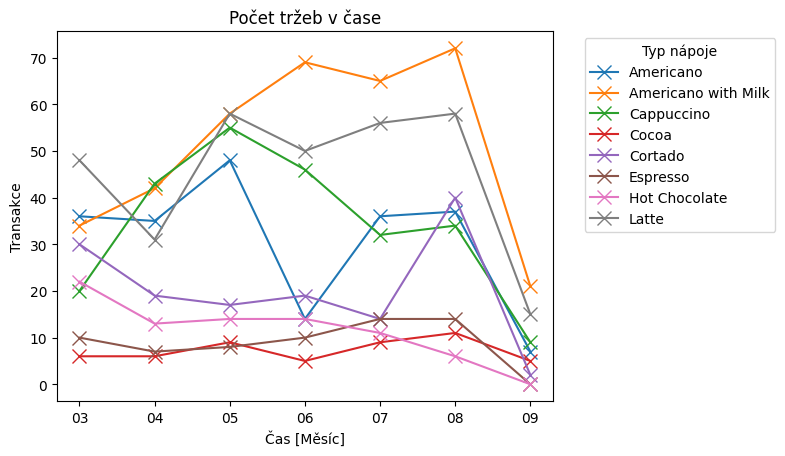

In [186]:
def draw(file):
    df = pd.read_csv(file)
    df['date'] = df['date'].str[5:7]
    grouped = df.groupby(['date', 'coffee_name'])['datetime'].count().unstack(fill_value = 0)
    grouped.plot(kind = 'line',xlabel = 'Čas [Měsíc]', ylabel = 'Transakce', title = 'Počet tržeb v čase',
                 marker = 'x', markersize = 10)
    plt.legend(title = 'Typ nápoje', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    
file = "index.csv"
draw(file)

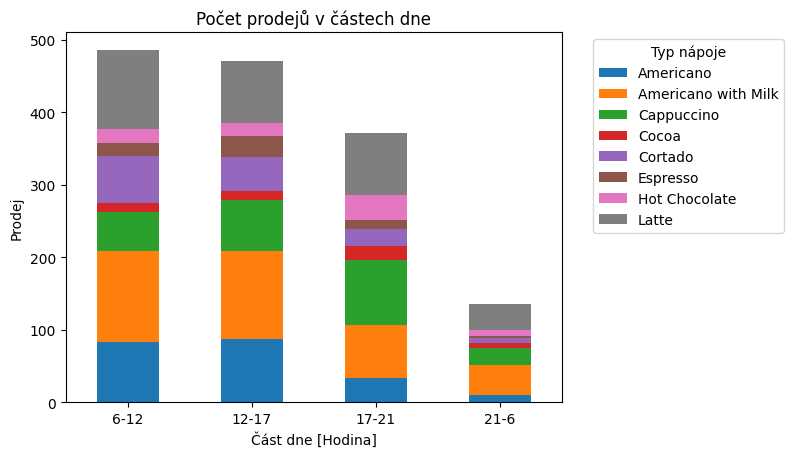

In [70]:
def draw(file):
    df = pd.read_csv(file)
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour
    
    def time_segmentation(hour):
        """
        hour: Input in time format of hour
        """
        if 6 <= hour < 12:
            return '6-12'
        elif 12 <= hour < 17:
            return '12-17'
        elif 17 <= hour < 21:
            return '17-21'
        else:
            return '21-6'

    df['day_seg'] = df['hour'].apply(time_segmentation)
    
    order = ['6-12', '12-17', '17-21', '21-6']

    df['day_seg'] = pd.Categorical(df['day_seg'], categories = order, ordered = True)
    grouped = df.groupby(['day_seg', 'coffee_name']).size().unstack(fill_value = 0)
    grouped.plot(kind = 'bar',stacked = True,
                  xlabel = "Část dne [Hodina]", ylabel = "Prodej", 
                  title = "Počet prodejů v částech dne",
                  rot = 0)
    plt.legend(title = 'Typ nápoje', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    
file = "index.csv"
draw(file)

# 6. Generování náhodných čísel a testování generátorů 

In [132]:
movements = []

def on_move(x, y):
    movements.append((x, y, time.time()))

def data_collection(duration = 5):
    with mouse.Listener(on_move = on_move) as listener:
        
        print(f"Délka záznamu pohybu myši {duration} sekund")
        time.sleep(duration)

    listener.stop()

def generate_seed():
    current_time = str(time.time())
    
    mouse_data = ''.join([f"{x}{y}{t}" for x, y, t in movements])
    
    data = current_time + mouse_data
    
    seed = int(hashlib.sha256(data.encode('utf-8')).hexdigest(), 16) % (2**32)
    
    return seed

data_collection(5)
seed = generate_seed()

rannum = 10
low = 0
limit = 100

random.seed(seed)
rn = [random.randint(low, limit) for _ in range(rannum)]
print(f"{rannum} náhodných čísel dle seedu {seed} v rozsahu ({low};{limit}): {rn}" )

Délka záznamu pohybu myši 5 sekund
10 náhodných čísel dle seedu 1860034163 v rozsahu (0;100): [93, 64, 100, 36, 40, 93, 35, 27, 8, 1]


# 7. Metoda Monte Carlo 

In [134]:
num_sim = 1000000
bald = 1/2
net = 0.9
hair_fall_rate = 0.1
in_food = 1 / 100

def simulation():
    if np.random.rand() < bald:
            if np.random.rand() < net:
                if np.random.rand() < hair_fall_rate:
                    if np.random.rand() < in_food:
                        return True
    return False

num_incidents = 0

for _ in range(num_sim):
    if simulation():
        num_incidents += 1

percentage = 100
expected_result = bald * net * hair_fall_rate * in_food * percentage
chance = num_incidents / num_sim * percentage
print(f"Z {num_sim} pokusů zda v jídle v restauraci bude vlas nám vyšla pravděpodobnost {chance}% s očekávanou realitou {expected_result:.5f}%")

Z 1000000 pokusů zda v jídle v restauraci bude vlas nám vyšla pravděpodobnost 0.0473% s očekávanou realitou 0.04500%


# 8. Derivace funkce jedné proměnné

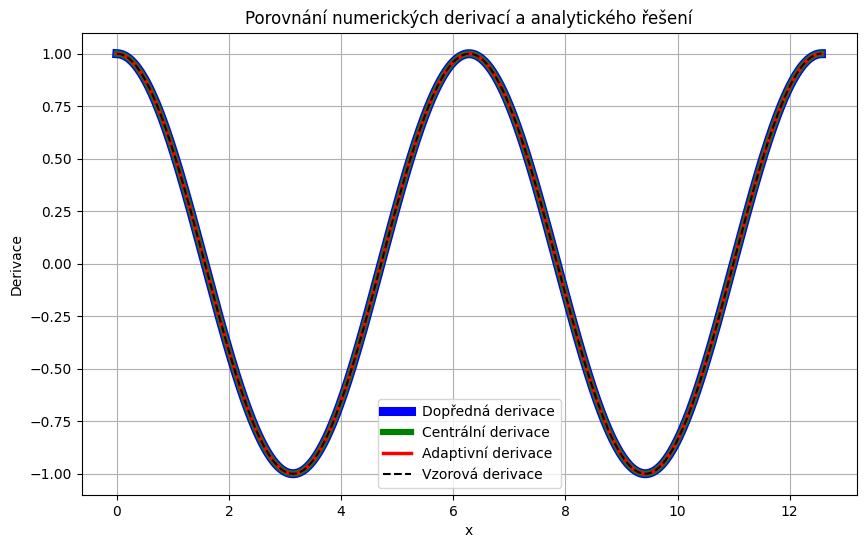

In [139]:
def f(x):
    return np.sin(x)

def f_check(x):
    return np.cos(x)

def forward(f, x, h):
    return (f(x + h) - f(x)) / h

def central(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def adaptive(f, x, tolerance = 1e-5):
    h = 1e-1 
    h_half = h / 2
    error = 1e10
    while error > tolerance:
        df1 = (f(x + h) - f(x - h)) / (2 * h)
        df2 = (f(x + h_half) - f(x - h_half)) / (2 * h_half)
        error = abs(df1 - df2) 
        h /= 2 
    return df2

x_values = np.linspace(0, 4 * np.pi, 1000)
h = 1e-5 

check_values = [f_check(x) for x in x_values]
forward_values = [forward(f, x, h) for x in x_values]
central_values = [central(f, x, h) for x in x_values]
adaptive_values = [adaptive(f, x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, forward_values, label="Dopředná derivace", color='blue', linewidth = 6.5)
plt.plot(x_values, central_values, label="Centrální derivace", color='green', linewidth = 4.5)
plt.plot(x_values, adaptive_values, label="Adaptivní derivace", color='red', linewidth = 2.5)
plt.plot(x_values, check_values, label="Vzorová derivace", color='black', linestyle='--', linewidth = 1.5)

plt.title("Porovnání numerických derivací a analytického řešení")
plt.xlabel("x")
plt.ylabel("Derivace")
plt.legend()
plt.grid(True)
plt.show()


# 9. Integrace funkce jedné proměnné

In [146]:
def poly(x):
    return x**3 - 3 * x**2 + 4 * x + 7

def harm(x):
    return 2*np.cos(3 * x - 1) 

def loga(x):
    return np.log(6 * x + 4) - (5 / 8)

def expo(x):
    return np.exp(x**4 + 2)

def riemann(f, a, b):
    return sc.integrate.quadrature(f, a ,b)[0] # Stačí vracet výsledek

def simpson(f, a, b, h = 0.01):
    return sc.integrate.simpson(f(np.arange(a, b + h, h)), np.arange(a, b + h, h))

def romberg(f, a, b):
    return sc.integrate.romberg(f, a, b)
 
a = 2
b = 4

print("==============================")
print("Funkce: Polynomická")
print(f"Riemann {riemann(poly, a, b)}")
print(f"Simpson {simpson(poly, a, b)}")
print(f"Romberg {romberg(poly, a, b)}")
print("==============================")
print("Funkce: Harmonická")
print(f"Riemann: {riemann(harm, a, b)}")
print(f"Simpson: {simpson(harm, a, b)}")
print(f"Romberg: {romberg(harm, a, b)}")
print("==============================")
print("Funkce: Logaritmická")
print(f"Riemann: {riemann(loga, a, b)}")
print(f"Simpson: {simpson(loga, a, b)}")
print(f"Romberg: {romberg(loga, a, b)}")
print("==============================")
print("Funkce: Exponenciální")
print(f"Riemann: {riemann(expo, a, b)}")
print(f"Simpson: {simpson(expo, a, b)}")
print(f"Romberg: {romberg(expo, a, b)}")
print("==============================")

Funkce: Polynomická
Riemann 42.00000000000001
Simpson 41.999999999998344
Romberg 42.0
Funkce: Harmonická
Riemann: -0.027377287900448577
Simpson: -0.027377288048254757
Romberg: -0.0273772879249396
Funkce: Logaritmická
Riemann: 4.906717788972184
Simpson: 4.906717788173321
Romberg: 4.906717788134204
Funkce: Exponenciální
Riemann: 4.375378136180842e+109
Simpson: 4.9389722364305635e+109
Romberg: 4.375397949083249e+109


In [11]:
def cumsem(inputvals):
    result = [inputvals[0]]
    for i in range(1, len(inputvals)):
        result.append(result[-1]+inputvals[i])
    return result

inputvals = [2,3,1,0,4]
print(cumsem(inputvals))

[2, 5, 6, 6, 10]
